## 1️⃣ Imports & Setup

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

## 2️⃣ Dataset Path

In [2]:
DATA_DIR = "../data/sampled-plants-diseases"        # root data folder
PLANT_NAME = "Apple"        # choose plant name 
PLANT_DIR = os.path.join(DATA_DIR, PLANT_NAME)

## 3️⃣ Basic Folder Check

In [3]:
assert os.path.exists(PLANT_DIR), f"Dataset not found: {PLANT_DIR}"

classes = sorted(os.listdir(PLANT_DIR))
print("Classes found:", classes)
print("Number of classes:", len(classes))

Classes found: ['Apple_scab', 'Black_rot', 'Cedar_apple_rust', 'healthy']
Number of classes: 4


## 4️⃣ Build DataFrame (image path + label)

In [4]:
filepaths = []
labels = []

for cls in classes:
    cls_path = os.path.join(PLANT_DIR, cls)
    for img in os.listdir(cls_path):
        filepaths.append(os.path.join(cls_path, img))
        labels.append(cls)

df = pd.DataFrame({
    "filepath": filepaths,
    "label": labels
})

df.head()

,filepath,label
0,../data/sampled-plants-diseases\Apple\Apple_sc...,Apple_scab
1,../data/sampled-plants-diseases\Apple\Apple_sc...,Apple_scab
2,../data/sampled-plants-diseases\Apple\Apple_sc...,Apple_scab
3,../data/sampled-plants-diseases\Apple\Apple_sc...,Apple_scab
4,../data/sampled-plants-diseases\Apple\Apple_sc...,Apple_scab


## 5️⃣ Dataset Size & Balance

Total images: 7771


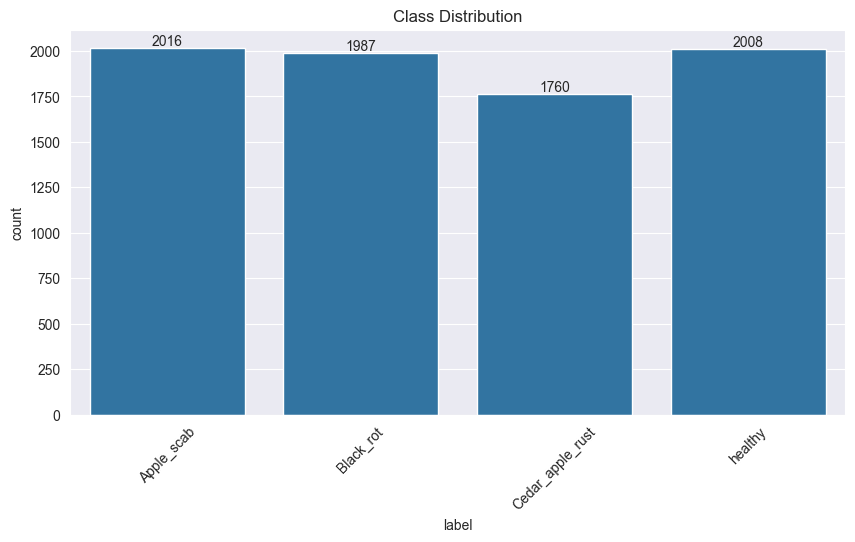

In [11]:
print("Total images:", len(df))

plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x="label")
plt.xticks(rotation=45)
plt.title("Class Distribution")

# Add counts to bars
for container in ax.containers:
    ax.bar_label(container)


## 6️⃣ Sample Images per Class

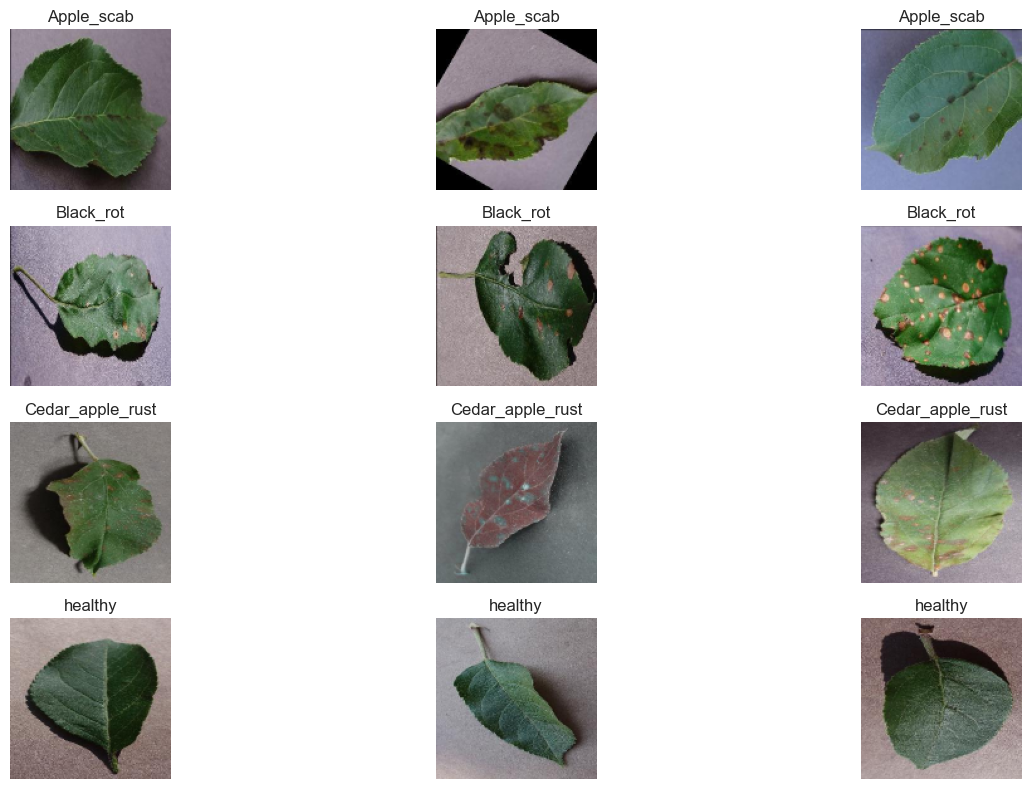

In [7]:
def show_samples(df, samples_per_class=3, img_size=(128,128)):
    plt.figure(figsize=(15, 8))
    i = 1
    
    for label in df["label"].unique():
        subset = df[df["label"] == label].sample(samples_per_class, random_state=42)
        for _, row in subset.iterrows():
            img = cv2.imread(row["filepath"])
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, img_size)

            plt.subplot(len(df["label"].unique()), samples_per_class, i)
            plt.imshow(img)
            plt.title(label)
            plt.axis("off")
            i += 1

    plt.tight_layout()
    plt.show()

show_samples(df)


## 7️⃣ Pixel Intensity Distribution

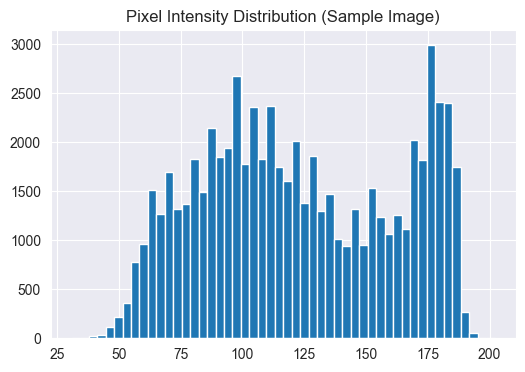

In [9]:
sample_img = cv2.imread(df.iloc[0]["filepath"])
gray = cv2.cvtColor(sample_img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(6,4))
plt.hist(gray.flatten(), bins=50)
plt.title("Pixel Intensity Distribution (Sample Image)")
plt.show()
